In [1]:
import pickle
import numpy as np
from itertools import permutations, combinations
import statistics
import math
import random
import matplotlib
import matplotlib.lines as mlines
import matplotlib.pyplot as plt
from scipy.stats import ttest_rel
from graphutils import utils
from lib.utilities import Repository



In [5]:
class bcolors:
    HEADER = '\033[95m'
    OKBLUE = '\033[94m'
    OKCYAN = '\033[96m'
    OKGREEN = '\033[92m'
    WARNING = '\033[93m'
    FAIL = '\033[91m'
    ENDC = '\033[0m'
    BOLD = '\033[1m'
    UNDERLINE = '\033[4m'

In [6]:
size = 8

for seed in [20250212, 20250214, 20250314]:
    for tid in range(5):
        print(f'------------------------------------------react-{seed}-{tid}--------------------------------------------')
        res = pickle.load(open(f'./chunk_ted_results/{seed}_{size}_{tid}_unbiased.pickle', 'rb'))
        print(res)

        # res = pickle.load(open(f'./chunk_ted_results/{seed}_{size}_{tid}_unbiased_inverse.pickle', 'rb'))
        # print(res)

        for task in ['col', 'tg']:
            try:
                print(f'------------------------------------------{task}-{seed}-{tid}--------------------------------------------')
                # res = pickle.load(open(f'./model_stats/{task}_{seed}_{size}_[{tid}]_gine_seq.pickle', 'rb'))
                # print(res)
                # res = pickle.load(open(f'./model_stats/{task}_{seed}_{size}_{tid}_gine_seq_inverse.pickle', 'rb'))
                # print(res)
                res = pickle.load(open(f'./model_stats/{task}_{seed}_{size}_[{tid}]_gine_own.pickle', 'rb'))
                print(res)
                # res = pickle.load(open(f'./model_stats/{task}_{seed}_{size}_[{tid}]_hot_lstm.pickle', 'rb'))
                # print(res)
                # res = pickle.load(open(f'./model_stats/{task}_{seed}_{size}_[{tid}]_gine_mono_context.pickle', 'rb'))
                # print(res)
                # res = pickle.load(open(f'./model_stats/{task}_{seed}_{size}_{tid}_unbiased_gine_multi.pickle', 'rb'))
                # print(res)
                res = pickle.load(open(f'./model_stats/{task}_{seed}_{size}_{tid}_unbiased_gine_alone_single_context.pickle', 'rb'))
                print(res)
            except:
                print(f'{bcolors.WARNING}Skipping {task}_{seed}_{size}_[{tid}]{bcolors.ENDC}')
                continue
    
    print('\n++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++\n')

------------------------------------------react-20250212-0--------------------------------------------
{'ra3': [0.5455, 0.6182, 0.4], 'mrr': [0.5455, 0.3727, 0.297]}
------------------------------------------col-20250212-0--------------------------------------------
{'ra3': [0.6545, 0.6727, 0.6909, 0.6727, 0.6545], 'mrr': [0.4667, 0.4333, 0.4485, 0.4515, 0.4333]}
{'ra3': [0.6727, 0.6909, 0.6909, 0.6727, 0.6909, 0.7091, 0.6909, 0.6909, 0.6545, 0.7091], 'mrr': [0.4576, 0.4424, 0.4485, 0.4242, 0.4697, 0.4606, 0.4273, 0.4273, 0.4091, 0.4364], 'trt': [0.5941090965270996, 0.5957973607381185, 0.5961728747685751, 0.5974799839655558, 0.5984846146901449, 0.5996552236874898, 0.5990271965662638, 0.6001461799939474, 0.6004001418749492, 0.6010993758837382], 'tet': [0.0013718841581633597, 0.0013668003949252043, 0.0013698384834058357, 0.0013675316174825035, 0.0013662108219031134, 0.001367588115460945, 0.001369125713001598, 0.0013654674472230854, 0.0013698002497355144, 0.0013721774130156547]}
---------

In [ ]:
task = 'col'

idx = None
if task == 'act':
    idx = 0
elif task == 'col':
    idx = 1
elif task == 'tg':
    idx = 2

file_postfix = ""

entry = "&"
gain_entry = "&"
ra3_gains = []
mrr_gains = []

select_k = 3
for size in range(3, 9):
    ra3_base, mrr_base = [], []
    ra3_list, mrr_list = [], []
    for seed in [20250212, 20250214, 20250314]:
        for tid in range(5):
            # print(f'------------------------------------------react-{seed}-{tid}--------------------------------------------')

            try:
                # res = pickle.load(open(f'./model_stats/{task}_{seed}_{size}_[{tid}]_hot_lstm.pickle', 'rb'))
                # res = pickle.load(open(f'./model_stats/{task}_{seed}_{size}_[{tid}]_gine_mono_context.pickle', 'rb'))
                # res = pickle.load(open(f'./model_stats/{task}_{seed}_{size}_[{tid}]_gine_seq.pickle', 'rb'))
                res = pickle.load(open(f'./model_stats/{task}_{seed}_{size}_[{tid}]_gine_own.pickle', 'rb'))
                # res = pickle.load(open(f'./model_stats/{task}_{seed}_{size}_[{tid}]_{file_postfix}.pickle', 'rb'))

                ra3_list.extend(res['ra3'])
                mrr_list.extend(res['mrr'])

                res = pickle.load(open(f'./chunk_ted_results/{seed}_{size}_{tid}_unbiased.pickle', 'rb'))
                ra3_base.append(res['ra3'][idx])
                mrr_base.append(res['mrr'][idx])

                # res = pickle.load(open(f'./model_stats/{task}_{seed}_{size}_[{tid}]_gine_seq.pickle', 'rb'))
                # ra3_base.extend(res['ra3'])
                # mrr_base.extend(res['mrr'])
            except Exception as e:
                print(seed, size, tid)
                print(e)
        
    # print(f'\n++++++++++++++++++++++++++++++++++++++++++++++++++++{seed}-{size}++++++++++++++++++++++++++++++++++++++++++++++++++++++++++')
    
    base_ra3 = int(round(statistics.mean(ra3_base), 2) * 100)
    base_mrr = int(round(statistics.mean(mrr_base), 2) * 100)

    final_ra3 = int(round(statistics.mean(ra3_list), 2) * 100)
    final_mrr = int(round(statistics.mean(mrr_list), 2) * 100)

    ra3_stdv = str(round(statistics.stdev(ra3_list), 2)).lstrip("0")
    mrr_stdv = str(round(statistics.stdev(mrr_list), 2)).lstrip("0")

    ra3_gain = round(((final_ra3 - base_ra3) / base_ra3) * 100, 2)
    mrr_gain = round(((final_mrr - base_mrr) / base_mrr) * 100, 2)

    ra3_gains.append(ra3_gain)
    mrr_gains.append(mrr_gain)

    if task != 'act':
        select_k = 1
        # entry += f" \\begin{{tabular}}[c]{{@{{}}l@{{}}}}$.{final_ra3}_{{{ra3_stdv}}}$\\\\ $.{final_mrr}_{{{mrr_stdv}}}$\end{{tabular}} &\n"
        gain_entry += f" \\begin{{tabular}}[c]{{@{{}}l@{{}}}}${ra3_gain}\\%$\\\\ ${mrr_gain}\\%$\end{{tabular}} &\n"
        entry += f" \\begin{{tabular}}[c]{{@{{}}l@{{}}}}$\\mathbf{{.{final_ra3}}}_{{{ra3_stdv}}}$\\\\ $\\mathbf{{.{final_mrr}}}_{{{mrr_stdv}}}$\end{{tabular}} &\n"
    else:
        entry += f" $.{final_ra3}_{{{ra3_stdv}}}$ &"
        gain_entry += f" ${ra3_gain}\\%$ &"

print(entry)
print()
print(gain_entry)    
print()
print(f'R@{select_k} Min={min(ra3_gains)} Max={max(ra3_gains)} Avg={round(statistics.mean(ra3_gains), 2)} | MRR Min={min(mrr_gains)} Max={max(mrr_gains)} Avg={round(statistics.mean(mrr_gains), 2)}')

& $.64_{.06}$ & $.63_{.05}$ & $.62_{.06}$ & $.62_{.06}$ & $.61_{.06}$ & $.63_{.07}$ &

& $4.92\%$ & $6.78\%$ & $10.71\%$ & $16.98\%$ & $12.96\%$ & $16.67\%$ &

Min=4.92 Max=16.98 Avg=11.5 | Min=4.92 Max=16.98 Avg=11.5


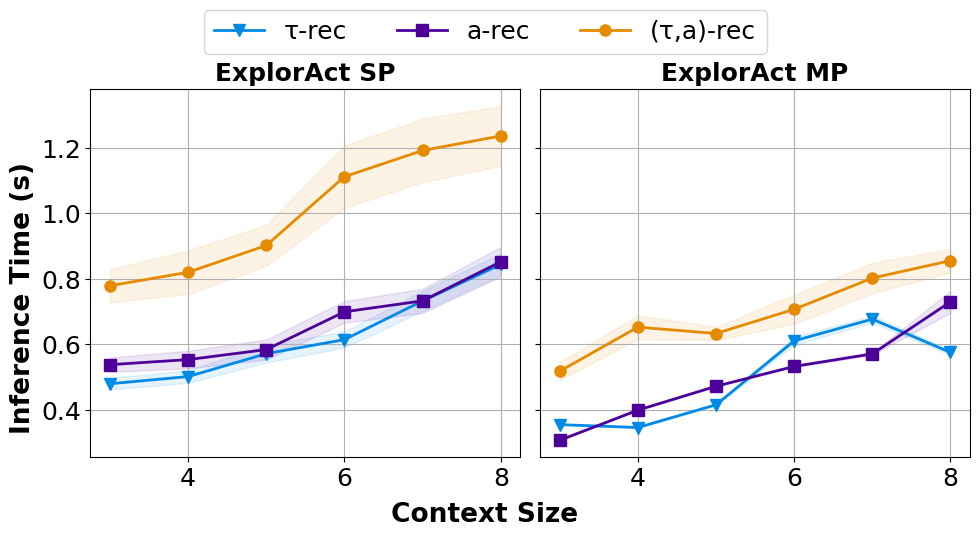

In [14]:
plt.close('all')

fontsize = 18
matplotlib.rc('xtick', labelsize=fontsize) 
matplotlib.rc('ytick', labelsize=fontsize) 

figure, axis = plt.subplots(nrows=1, ncols=2, sharex=True, sharey=True, figsize=(10, 5))

tasks = ['act', 'col', 'tg']
colors = ['#008ae6', '#4d0099', '#e68a00']
markers = ['v', 's', 'o']

tau = u"\u03C4"
labels = [f"{tau}-rec", 'a-rec', f"({tau},a)-rec"]

titles = ['ExplorAct SP', 'ExplorAct MP']

for i, file_fix in enumerate(['seq', 'own']):
    times = {}
    for task in tasks:
        avg = []
        std = []
        for size in range(3, 9):
            res = pickle.load(open(f'./model_stats/{task}_{size}_gine_{file_fix}_time.pickle', 'rb'))
            # print(res)
            avg.append(res['avg'] / 1e9)
            std.append(res['stdv'] / 1e9)
        times[task] = (np.array(avg), np.array(std))

    x = list(range(3, 9))
    for j, task in enumerate(tasks):
        axis[i].plot(x, times[task][0], marker=markers[j], markersize=8, linestyle='-', linewidth=2, color=colors[j], label=labels[j])
        axis[i].fill_between(x, times[task][0] - times[task][1], times[task][0] + times[task][1], color=colors[j], alpha=0.1)
        axis[i].grid(True)
        axis[i].set_title(titles[i], fontsize=fontsize, fontweight='bold')

handles, labels = axis[0].get_legend_handles_labels()
lgd = figure.legend(handles, labels, loc='upper center', ncols=4, fontsize=fontsize, bbox_to_anchor=(0.5, 1.1))
lblx = figure.supxlabel('Context Size', fontsize=fontsize+1, fontweight='bold', y=0.04)
lbly = figure.supylabel('Inference Time (s)', fontsize=fontsize+1, fontweight='bold', x=0.025)
plt.tight_layout()
plt.savefig(f'./time_plots/inference_plot.pdf', format='pdf', bbox_extra_artists=(lgd, lblx, lbly), bbox_inches='tight')
plt.show()

In [ ]:
plt.close('all')

fontsize = 10
matplotlib.rc('xtick', labelsize=fontsize) 
matplotlib.rc('ytick', labelsize=fontsize) 

figure, axis1 = plt.subplots(figsize=(5, 2.5))

colors = ['#008ae6', '#4d0099', '#e68a00']
markers = ['v', 's', 'o']
msize=5

tau = u"\u03C4"
labels = ['REACT', 'ExplorAct-SP', 'ExplorAct-MP']

# axis2 = axis1.twinx()

seed = 20250314
for i in range(3):
    if i == 0:
        res = pickle.load(open(f'./chunk_ted_results/{seed}_{3}_time.pickle', 'rb'))
        # print(res)
        x = res['log_sizes']
        times = np.array(res['time']) / 1e9
        axis1.plot(x, times, marker=markers[i], markersize=msize, linestyle='-', linewidth=2, color=colors[i], label=labels[i])
    elif i == 1:
        res = pickle.load(open(f'./model_stats/{seed}_{3}_gine_seq_logtime.pickle', 'rb'))
        x = res['log_sizes']
        avgs = np.array(res['avgs']) / 1e9
        stdevs = np.array(res['stdevs']) / 1e9
        axis1.plot(x, avgs, marker=markers[i], markersize=msize, linestyle='-', linewidth=2, color=colors[i], label=labels[i])
        axis1.fill_between(x, avgs - stdevs, avgs + stdevs, color=colors[i], alpha=0.1)
    elif i == 2:
        res = pickle.load(open(f'./model_stats/{seed}_{3}_gine_own_logtime.pickle', 'rb'))
        x = res['log_sizes']
        avgs = np.array(res['avgs']) / 1e9
        stdevs = np.array(res['stdevs']) / 1e9
        axis1.plot(x, avgs, marker=markers[i], markersize=msize, linestyle='-', linewidth=2, color=colors[i], label=labels[i])
        axis1.fill_between(x, avgs - stdevs, avgs + stdevs, color=colors[i], alpha=0.1)

    axis1.grid(True)
    # axis[i].set_title(f'{titles[i]}', fontsize=fontsize, fontweight='bold')

    axis1.set_yscale('log')

# handles, labels = axis1.get_legend_handles_labels()
# lgd = figure.legend(handles, labels, loc='upper center', ncols=2, fontsize=fontsize, bbox_to_anchor=(0.5, 1.17))
axis1.legend(loc=0, fontsize=fontsize)
lblx = figure.supxlabel('Session Log Size', fontsize=fontsize+1, fontweight='bold', y=0.08)
lbly = figure.supylabel('Inf. Time (s)-log Scale', fontsize=fontsize+1, fontweight='bold', x=0.05)
plt.tight_layout()
plt.savefig(f'./time_plots/react_log_plot_single.pdf', format='pdf') #, bbox_extra_artists=(lgd, lblx, lbly), bbox_inches='tight')
plt.show()